In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('diabetes 2.csv')

In [4]:
data.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
344,8,95,72,0,0,36.8,0.485,57,0
604,4,183,0,0,0,28.4,0.212,36,1
672,10,68,106,23,49,35.5,0.285,47,0
471,0,137,70,38,0,33.2,0.170,22,0
661,1,199,76,43,0,42.9,1.394,22,1


In [5]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
data.duplicated().sum()

0

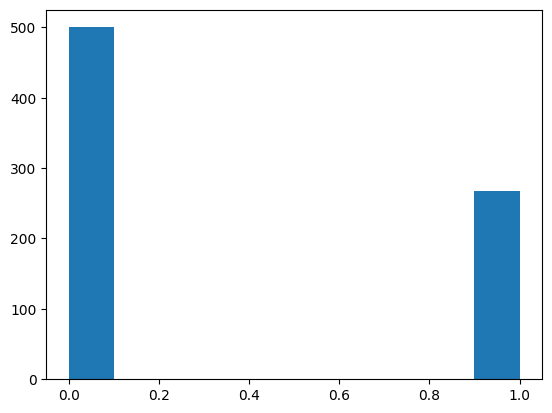

In [9]:
'eda'
plt.hist(data['Outcome'])
plt.show()

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [13]:
data.shape

(768, 9)

In [14]:
np.mean(data['Pregnancies'])

3.8450520833333335

In [15]:
np.median(data['Insulin'])

30.5

In [16]:
np.mean(data['Age'])

33.240885416666664

In [17]:
data['Pregnancies']+data['Glucose']

0      154
1       86
2      191
3       90
4      137
      ... 
763    111
764    124
765    126
766    127
767     94
Length: 768, dtype: int64

In [20]:
from scipy import stats

In [22]:
stats.mode(data['Age'])

ModeResult(mode=22, count=72)

In [23]:
stats.mode(data['Pregnancies'])

ModeResult(mode=1, count=135)

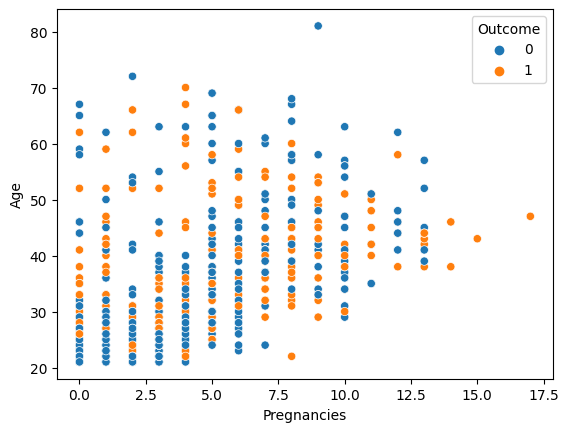

In [24]:
sns.scatterplot(x=data['Pregnancies'],y=data['Age'],hue=data['Outcome'])
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_5884\975506526.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=data['Age'],kde=False,hist_kws={'rwidth':0.2})


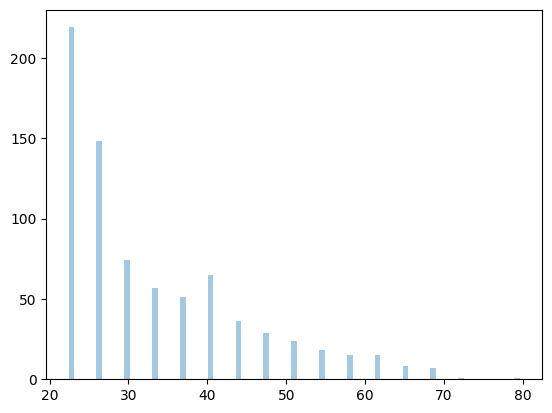

In [29]:
sns.distplot(x=data['Age'],kde=False,hist_kws={'rwidth':0.2})
plt.show()

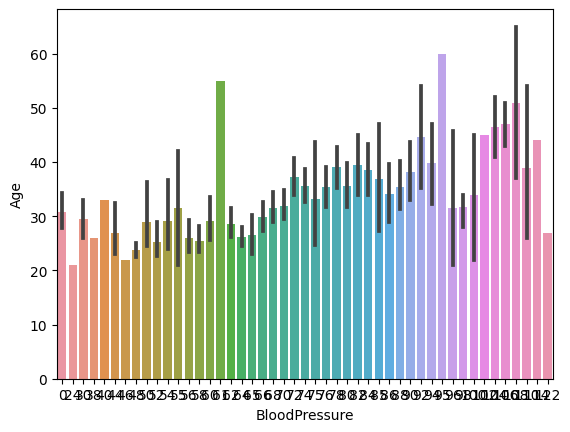

In [31]:
sns.barplot(x=data['BloodPressure'],y=data['Age'])
plt.show()

In [34]:
data.corr()['Outcome']

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

In [36]:
x=data.iloc[:,0:8]
y=data.iloc[:,-1]

In [37]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [38]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [40]:
clf=LogisticRegression()

In [42]:
clf.fit(x_train,y_train)

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [43]:
y_pred=clf.predict(x_test)

In [44]:
accuracy_score(y_pred,y_test)

0.7467532467532467

In [45]:
pd.DataFrame(confusion_matrix(y_pred,y_test))

,0,1
0,78,18
1,21,37


In [47]:
from sklearn.neighbors import KNeighborsClassifier

In [48]:
knn=KNeighborsClassifier(n_neighbors=7)

In [49]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [50]:
y_pred2=knn.predict(x_test)

In [51]:
print(accuracy_score(y_pred2,y_test))

0.6883116883116883


In [52]:
from sklearn.tree import DecisionTreeClassifier

In [53]:
tree_clf=DecisionTreeClassifier(criterion='entropy',max_depth=2)

In [54]:
tree_clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [55]:
y_pred3=tree_clf.predict(x_test)

In [56]:
print(accuracy_score(y_pred3,y_test))

0.7727272727272727


In [57]:
data['Pregnancies'].sum()

2953

In [58]:
data['Age'].sum()

25529